In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

from math import sin, cos, sqrt, atan2
import math

In [2]:
#df1=pd.read_csv("date-hour-soo-dest-2011.csv")
#df2=pd.read_csv("date-hour-soo-dest-2012.csv")
#df3=pd.read_csv("date-hour-soo-dest-2013.csv")
#df4=pd.read_csv("date-hour-soo-dest-2014.csv")
#df5=pd.read_csv("date-hour-soo-dest-2015.csv")
#df6=pd.read_csv("date-hour-soo-dest-2016.csv")
#df7=pd.read_csv("date-hour-soo-dest-2017.csv")
#df8=pd.read_csv("date-hour-soo-dest-2018.csv")
df9=pd.read_csv("date-hour-soo-dest-2019.csv")
df10=pd.read_csv("date-hour-soo-dest-2020.csv")
df=pd.concat([df9,df10],ignore_index=True)

In [3]:
df.shape

(15926148, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926148 entries, 0 to 15926147
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 607.5+ MB


In [5]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2019-01-01,0,12TH,12TH,3
1,2019-01-01,0,12TH,16TH,4
2,2019-01-01,0,12TH,ANTC,1
3,2019-01-01,0,12TH,BAYF,1
4,2019-01-01,0,12TH,CIVC,2


In [6]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
15926143,2020-12-31,23,FRMT,BERY,1
15926144,2020-12-31,23,FRMT,MLPT,1
15926145,2020-12-31,23,MCAR,ANTC,1
15926146,2020-12-31,23,MLBR,MLBR,1
15926147,2020-12-31,23,POWL,BERY,1


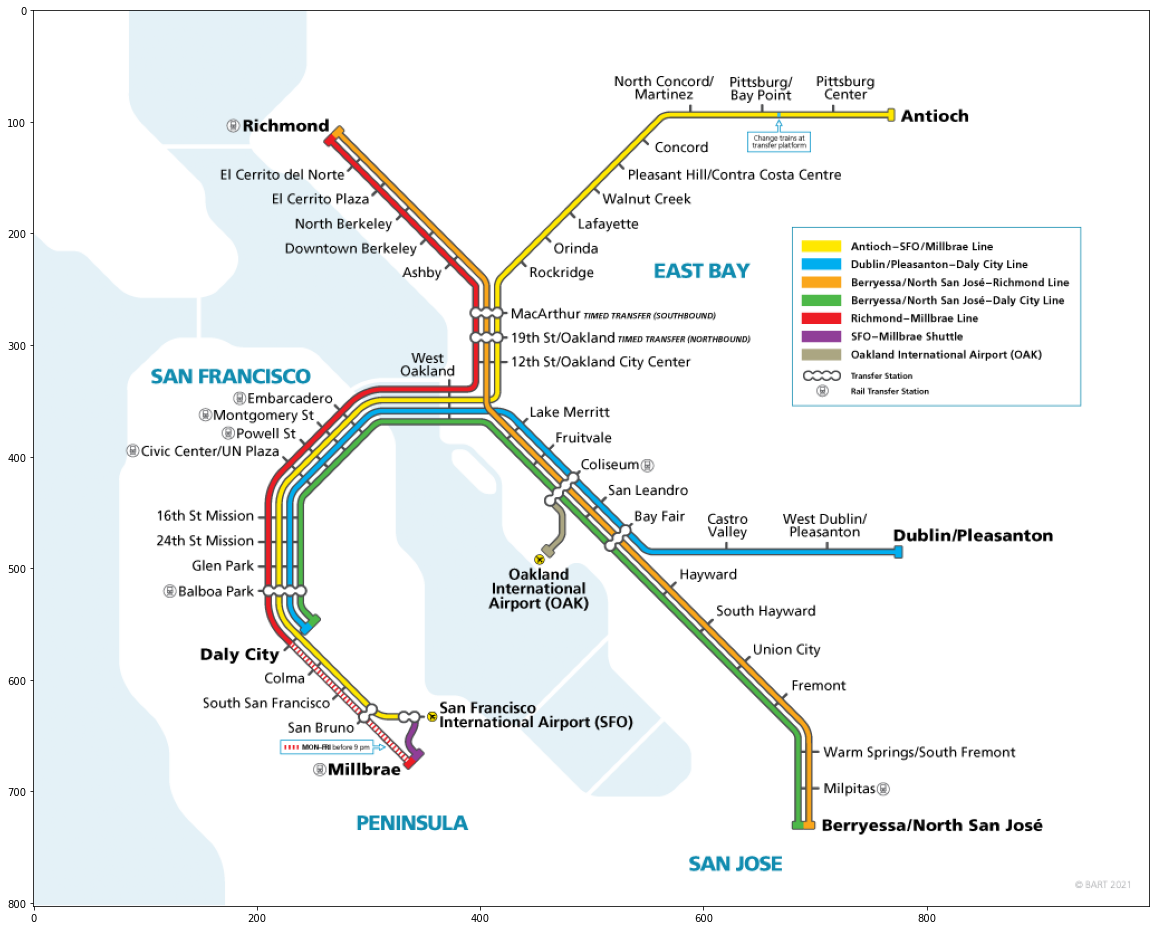

In [7]:
plt.figure(figsize=(20,20))
img=plt.imread('system-map-weekday.png')
plt.imshow(img)
plt.show()

In [8]:
station_coords=pd.read_csv("station_coords.csv").drop("Unnamed: 0",axis=1)

In [9]:
station_coords.sample(4)

,station_name,latitute,longitude
38,PCTR,1695,193
28,MLPT,1525,1765
1,19TH,798,655
33,WCRK,1135,394


## Question A: Compute the straight line distance between every station

In [10]:
station_coords.columns=["Origin Station","o_latitute","o_longitude"]

In [11]:
df=pd.merge(df,station_coords)

In [12]:
station_coords.columns=["Destination Station","d_latitute","d_longitude"]

In [13]:
df=pd.merge(df,station_coords)

In [14]:
df=df.drop_duplicates()

In [15]:
R = 6373.0 #km cinsinden yaklaşık dünyanın yarıçapı

In [16]:
lat1=df["o_latitute"]
lon1=df["o_longitude"]
lat2=df["d_latitute"]
lon2=df["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)

a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df["distance"]=distance

In [17]:
df_distance_table=df[["Origin Station","Destination Station","distance"]].drop_duplicates().reset_index(drop=True)

In [18]:
df_distance_table=df_distance_table[df_distance_table["distance"]!=0]

In [19]:
import networkx as nx
df_distance_table=nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [20]:
df_distance_table.nodes()

NodeView(('12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF', 'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR', 'MLBR', 'MONT', 'NBRK', 'OAKL', 'ORIN', 'PCTR', 'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK', 'NCON', 'BERY', 'MLPT'))

In [21]:
df_distance_table.edges()

EdgeView([('12TH', '12TH'), ('12TH', '16TH'), ('12TH', '19TH'), ('12TH', '24TH'), ('12TH', 'ANTC'), ('12TH', 'ASHB'), ('12TH', 'BALB'), ('12TH', 'BAYF'), ('12TH', 'CAST'), ('12TH', 'CIVC'), ('12TH', 'COLM'), ('12TH', 'COLS'), ('12TH', 'CONC'), ('12TH', 'DALY'), ('12TH', 'DBRK'), ('12TH', 'DELN'), ('12TH', 'DUBL'), ('12TH', 'EMBR'), ('12TH', 'FRMT'), ('12TH', 'FTVL'), ('12TH', 'GLEN'), ('12TH', 'HAYW'), ('12TH', 'LAFY'), ('12TH', 'LAKE'), ('12TH', 'MCAR'), ('12TH', 'MLBR'), ('12TH', 'MONT'), ('12TH', 'NBRK'), ('12TH', 'OAKL'), ('12TH', 'ORIN'), ('12TH', 'PCTR'), ('12TH', 'PHIL'), ('12TH', 'PITT'), ('12TH', 'PLZA'), ('12TH', 'POWL'), ('12TH', 'RICH'), ('12TH', 'ROCK'), ('12TH', 'SANL'), ('12TH', 'SBRN'), ('12TH', 'SFIA'), ('12TH', 'SHAY'), ('12TH', 'SSAN'), ('12TH', 'UCTY'), ('12TH', 'WARM'), ('12TH', 'WCRK'), ('12TH', 'WDUB'), ('12TH', 'WOAK'), ('12TH', 'NCON'), ('12TH', 'BERY'), ('12TH', 'MLPT'), ('16TH', '16TH'), ('16TH', '19TH'), ('16TH', '24TH'), ('16TH', 'ANTC'), ('16TH', 'ASHB'), 

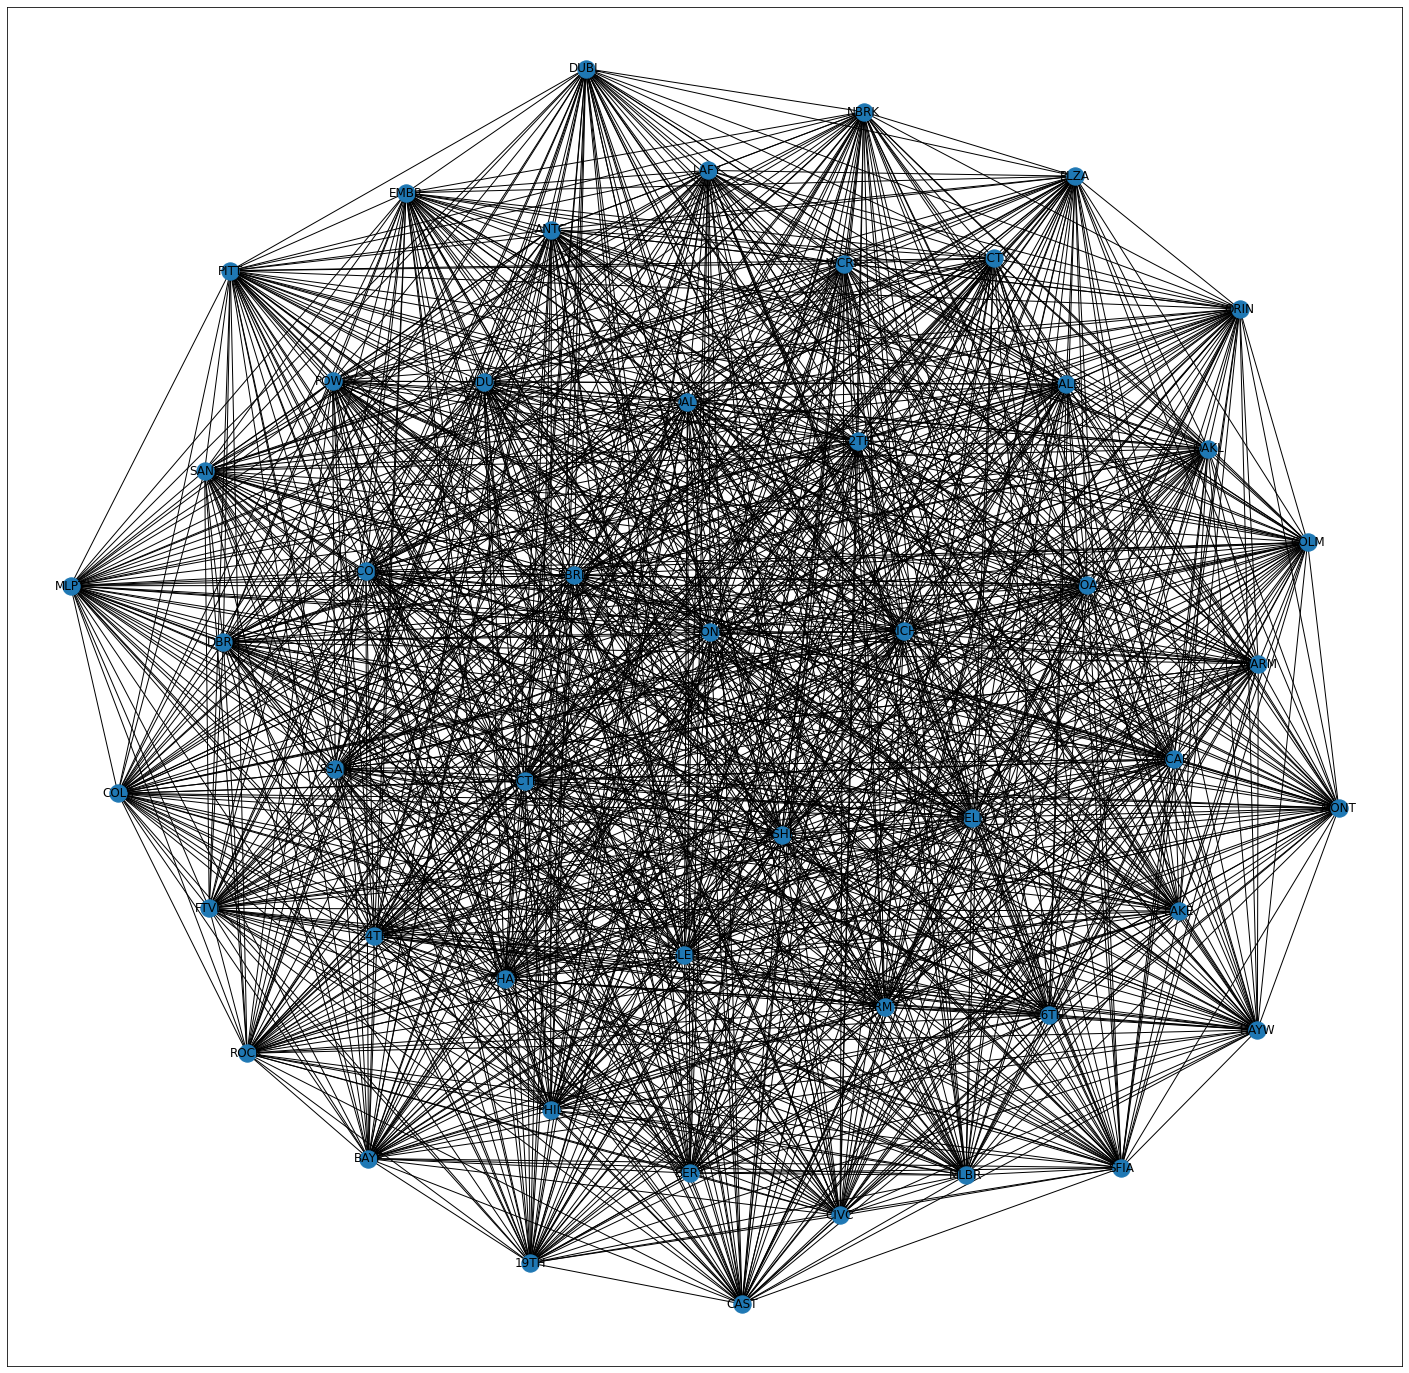

In [22]:
plt.figure(figsize=(25,25))
nx.draw_networkx(df_distance_table,with_labels=True)

## Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:

In [23]:
df=df.drop(["o_latitute","o_longitude","d_latitute","d_longitude"],axis=1)

In [24]:
df["Date"]=pd.to_datetime(df['Date'])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

In [25]:
df.sample(5)

,Hour,Origin Station,Destination Station,Trip Count,distance,Day,Month,Year,WeekDay,Month_Name
4070565,8,MLBR,EMBR,2,1038.286262,3,6,2020,Thursday,June
11748516,15,SSAN,MONT,14,11521.473175,1,1,2019,Tuesday,January
2888401,8,PCTR,CONC,4,13606.020798,5,2,2019,Saturday,February
2873459,15,NBRK,CONC,2,8574.656981,3,12,2019,Thursday,December
7513834,13,SANL,POWL,1,14080.658412,0,6,2020,Monday,June


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926148 entries, 0 to 15926147
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Hour                 int64  
 1   Origin Station       object 
 2   Destination Station  object 
 3   Trip Count           int64  
 4   distance             float64
 5   Day                  int64  
 6   Month                int64  
 7   Year                 int64  
 8   WeekDay              object 
 9   Month_Name           object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.3+ GB


In [27]:
df.describe()

,Hour,Trip Count,distance,Day,Month,Year
count,1.592615e+07,1.592615e+07,1.592615e+07,1.592615e+07,1.592615e+07,1.592615e+07
mean,1.366112e+01,9.420726e+00,9.792999e+03,2.809430e+00,6.303560e+00,2.019365e+03
std,5.300877e+00,2.814895e+01,4.987451e+03,1.914224e+00,3.532008e+00,4.814094e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.019000e+03
25%,9.000000e+00,1.000000e+00,6.011095e+03,1.000000e+00,3.000000e+00,2.019000e+03
50%,1.400000e+01,3.000000e+00,9.673148e+03,3.000000e+00,6.000000e+00,2.019000e+03
75%,1.800000e+01,7.000000e+00,1.406897e+04,4.000000e+00,9.000000e+00,2.020000e+03
max,2.300000e+01,1.056000e+03,1.989522e+04,6.000000e+00,1.200000e+01,2.020000e+03


In [28]:
df.corr()

,Hour,Trip Count,distance,Day,Month,Year
Hour,1.000000,-0.017762,0.002101,0.056563,-0.002508,-0.019059
Trip Count,-0.017762,1.000000,-0.018077,-0.065464,-0.033953,-0.108080
distance,0.002101,-0.018077,1.000000,-0.001556,-0.000052,0.002098
Day,0.056563,-0.065464,-0.001556,1.000000,-0.017433,-0.012453
Month,-0.002508,-0.033953,-0.000052,-0.017433,1.000000,-0.078726
Year,-0.019059,-0.108080,0.002098,-0.012453,-0.078726,1.000000


<AxesSubplot:>

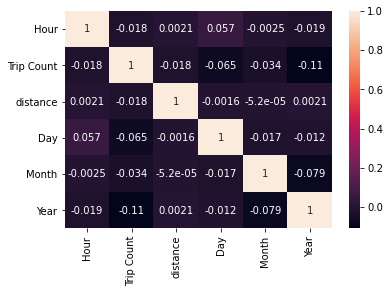

In [29]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Hour', ylabel='count'>

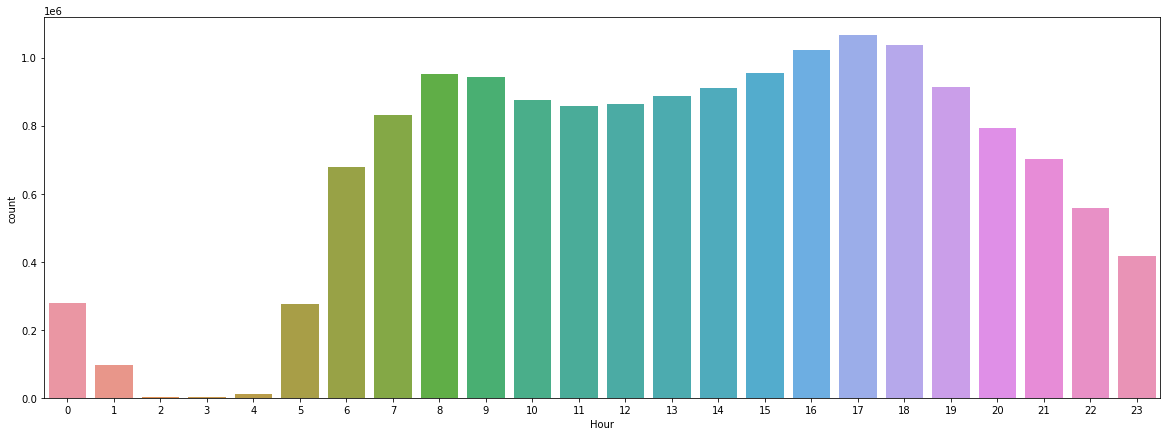

In [30]:
plt.figure(figsize=(20,7))
sns.countplot(df["Hour"])
# En çok 17 ve 18 saatlerinde yoğunluk oluşmaktadır.

<AxesSubplot:xlabel='WeekDay', ylabel='count'>

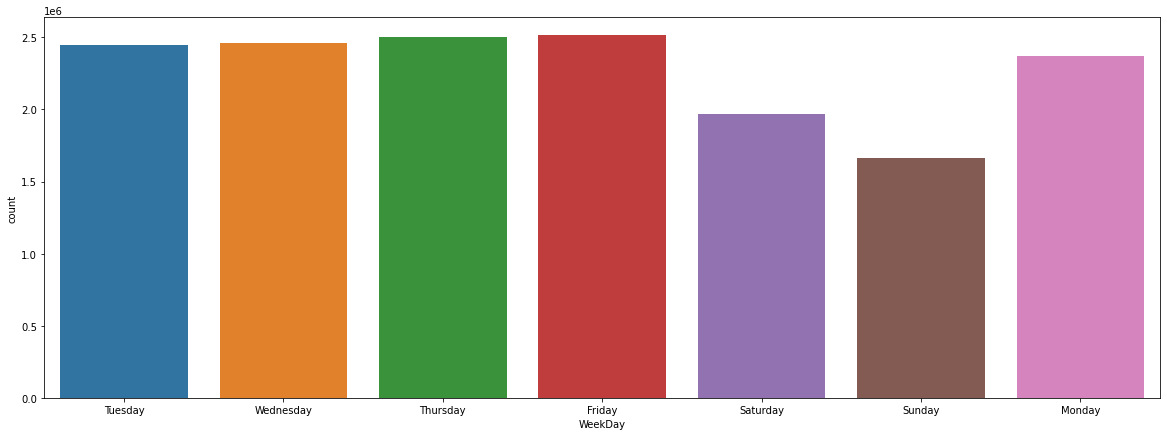

In [31]:
plt.figure(figsize=(20,7))
sns.countplot(df["WeekDay"])
#Hafta içleri yoğunluk ortalama olarak aynı ama hafta sonları yoğunluk düşmüştür.

<AxesSubplot:xlabel='Month_Name', ylabel='count'>

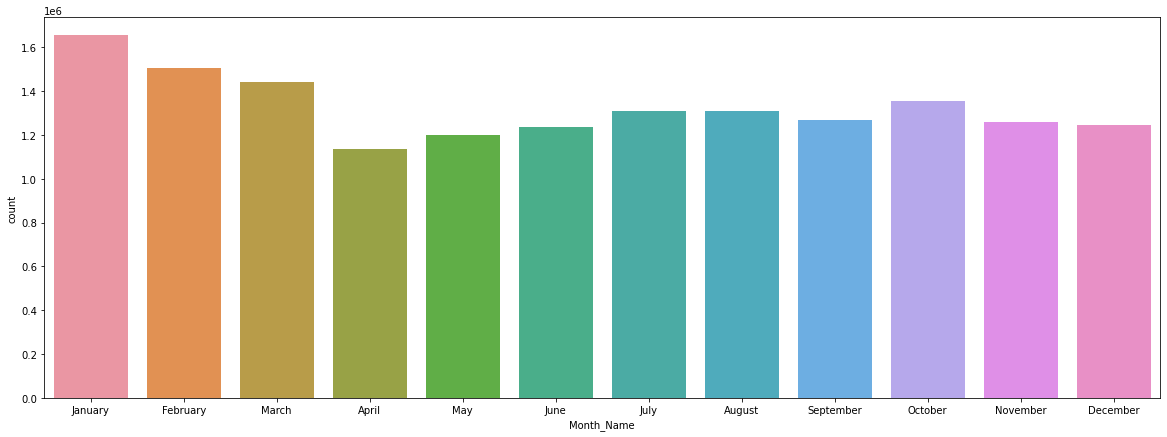

In [32]:
plt.figure(figsize=(20,7))
sns.countplot(df["Month_Name"])
#Ortalama olarak her ay aynı sayıda yolcu taşınmıştır.

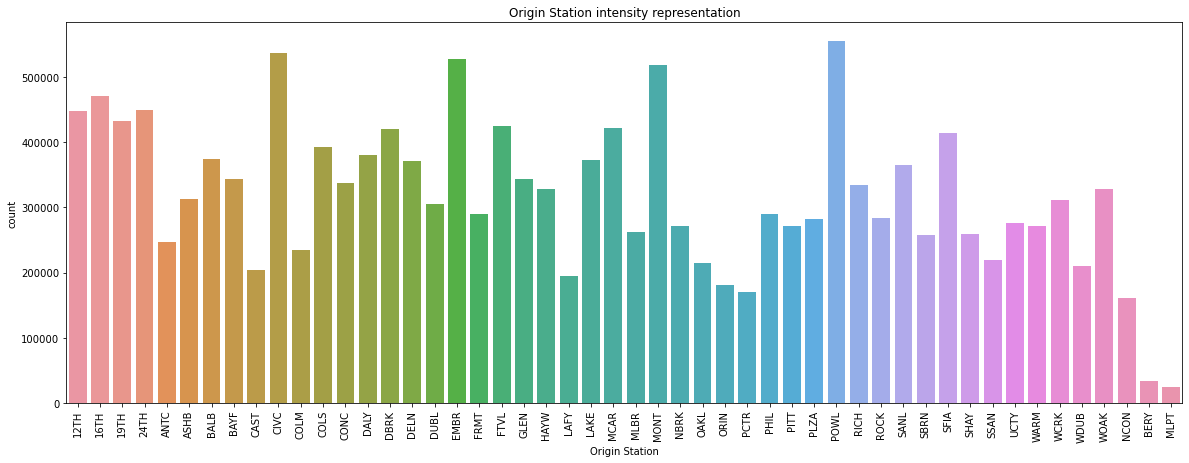

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(df["Origin Station"])
plt.title("Origin Station intensity representation")
plt.xticks(rotation=90);

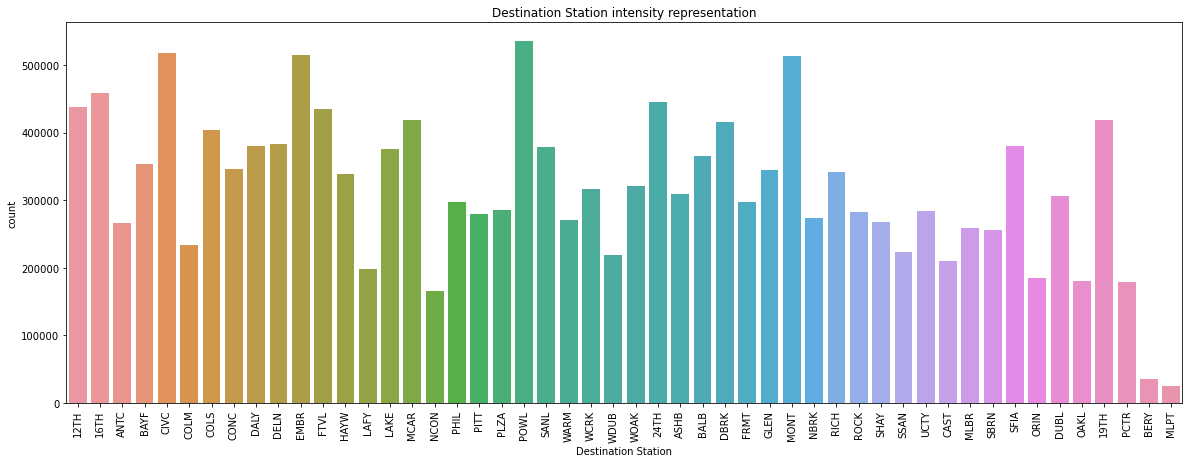

In [34]:
plt.figure(figsize=(20,7))
sns.countplot(df["Destination Station"])
plt.title("Destination Station intensity representation")
plt.xticks(rotation=90);

In [35]:
df_reg=df

In [36]:
#x,y=df.drop("Day",axis=1),df[["Day"]]

In [37]:
df_reg.drop(["Origin Station","Destination Station","WeekDay","Month_Name"],axis=1,inplace=True)

In [38]:
df_reg.sample(5)

,Hour,Trip Count,distance,Day,Month,Year
5263579,10,4,5265.945625,4,6,2019
7739393,14,1,10389.919153,5,10,2020
5603641,7,4,14571.538052,0,7,2020
8823151,6,2,11210.039842,3,10,2019
11738437,16,3,16340.497189,6,11,2020


In [39]:
x,y=df.drop("Trip Count",axis=1),df[["Trip Count"]]

In [40]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    
    return result.sort_values('R_Squared',ascending=False)

In [41]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
ExtraTreeRegressor,0.378299,22.154867,6.833518
KNeighborsRegressor,0.365692,22.378375,6.962734
GradientBoostingRegressor,0.103936,26.597943,10.039534
Ridge,0.018594,27.835742,10.656682
LinearRegression,0.018594,27.835742,10.656682
Lasso,0.012541,27.921452,10.745839
ElasticNet,0.010480,27.950572,10.787283


In [43]:
# Yolcu sayısı alanı olmadığı için değerler düşük seviyede çıkmıştır.